# Exploratory Data analysis on Loan Defaulter

#### Problem Statement: Understand and extract informations from the bank data set provided and arrive at feassible conditions for risk management and profit enhancement by learning and modelling the patterns.

# 1.Download the data
1) Find the appropriate data sets.

2) Make sure the data set informations are adequate.

3) Download the data

 # 2. Data Preparation and Cleaning
1)Load the required data set using pandas.

2)Extract the required numerical informations.

3)Extract the categorical informations.

3)Fix the problems related with missing values, erros and other issues related with the data.

In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 3. Performing data check on current data set

In [2]:
#reading the data set
df=pd.read_csv("application_data.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Determining the total number of columns and rows of the given dataset 
df.shape

(307511, 122)

In [5]:
#Lists all the column names of the data set
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
#Extracting information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#Extracting statistical information
df.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
#sorting the columns based on the occurence of null values
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [9]:
#calculating the missing percentage of null values
missing_percentage= round(df.isnull().mean()*100,2).sort_values(ascending = False)
missing_percentage

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

<AxesSubplot:>

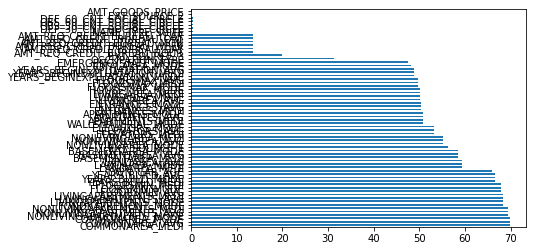

In [10]:
#plot based on missing values
missing_percentage[missing_percentage!=0].plot(kind='barh')

In [11]:
#Remove the columns with more than 50% of nul values
min_count =  int(((100-50.0)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)
mod_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#to find the shape of dataset(rowns and columns)
mod_df.shape


(307511, 81)

In [13]:
#Removing columns containing datas that seem useless.
to_drop=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

mod_df.drop(labels=to_drop,axis=1,inplace=True)
mod_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
mod_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'O

In [15]:
#finding numeric columns out of the new data set
numerics = ['int16', 'int32', 'int64','float64']

mod_df.select_dtypes(include=numerics).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_

In [16]:
#converting the data types of few columns to int
Colconversion = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
mod_df.loc[:,Colconversion]=mod_df.loc[:,Colconversion].apply(lambda col: col.astype('int',errors='ignore'))

mod_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fixing the missing values

In [17]:
#finding the columns with more than a thereshold percetage of null values
list(mod_df.columns[(mod_df.isnull().mean()<=0.13) & (mod_df.isnull().mean()>0)])


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

#### Imputation of EXT_SOURCE_2

In [18]:
mod_df['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

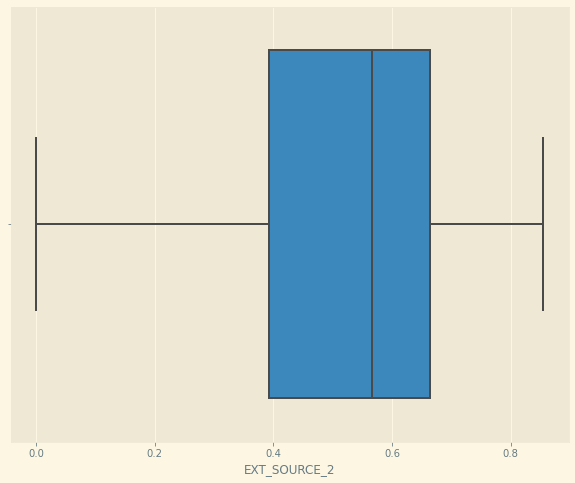

In [19]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=[10,8])
sns.boxplot(mod_df['EXT_SOURCE_2'])
plt.show()

In [20]:
#As EXT_SOURCE_2 has no outlier, we can go for mean operation
Value = round(mod_df['EXT_SOURCE_2'].mean(),2)
print(f'As EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the column {Value}')

As EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the column 0.51


#### Imputation of AMT_ANNUITY

In [21]:
mod_df['AMT_ANNUITY'].value_counts()


9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

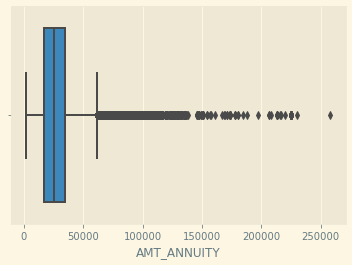

In [22]:
sns.boxplot(mod_df['AMT_ANNUITY'])
plt.show()

In [23]:
Value = round(mod_df['AMT_ANNUITY'].median(),2)
print(f'As AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn {Value}')

As AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn 24903.0


#### Imputation of  NAME_TYPE_SUITE

In [24]:
mod_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
#Value = mod_df['NAME_TYPE_SUITE'].mode()
print("So, the column NAME_TYPE_SUITE is a categorical column. Hence, this column can be imputed using the mode of the column") 

So, the column NAME_TYPE_SUITE is a categorical column. Hence, this column can be imputed using the mode of the column


#### Imputation of CNT_FAM_MEMBERS

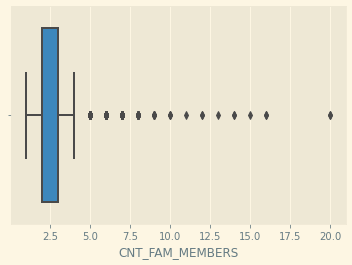

In [26]:
sns.boxplot(mod_df['CNT_FAM_MEMBERS'])
plt.show()

In [27]:
Value = round(mod_df['CNT_FAM_MEMBERS'].median(),2)
print(f'As CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn  {Value}')

As CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn  2.0


#### Imputation of  AMT_GOODS_PRICE

In [28]:
 mod_df['AMT_GOODS_PRICE'].value_counts()


450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

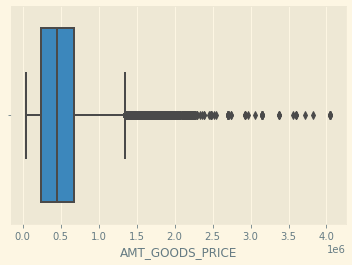

In [29]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(mod_df['AMT_GOODS_PRICE'])
plt.show()

In [30]:
Value= round(mod_df['AMT_GOODS_PRICE'].median(),2)
print(f'As AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn {Value}')

As AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn 450000.0


##### Making gender  more readable by filling up the null spaces

In [31]:
mod_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [32]:
#Removing values XNA and replacing with F
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [33]:
mod_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Fixing issues with organisation type

In [34]:
mod_df['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [35]:
mod_df=mod_df.drop(mod_df.loc[mod_df['ORGANIZATION_TYPE']=='XNA'].index)
mod_df[mod_df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 53)

### Checking target imbalance

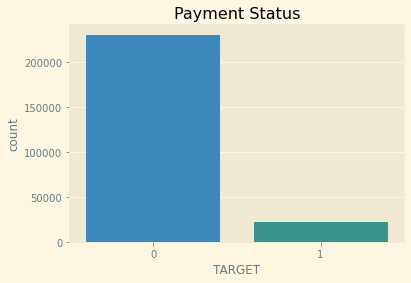

In [36]:
plt.title("Payment Status")
sns.countplot(mod_df['TARGET'])
plt.show()

In [37]:
#calculating the imbalance
mod_df['TARGET'].value_counts(normalize=True)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

#### Observations:
- There is an imbalance between people who defaulted and who didn't default. More than 91% of people didn't defaultand 8% defaulted.

### Variable binning for analysis

In [38]:
#binning of AMT_INCOME_TOTAL
mod_df['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        90000.0
0.3       121500.0
0.6       180000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
#Creating A new categorical variable based on income total
mod_df['INCOME_GROUP']=pd.qcut(mod_df['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [40]:
#Binning DAYS_BIRTH
abs(mod_df['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10051.0
0.3    12365.0
0.6    15679.0
0.8    18267.8
1.0    25200.0
Name: DAYS_BIRTH, dtype: float64

In [41]:
# creating newvariable age based on data derived
mod_df['AGE']=abs(mod_df['DAYS_BIRTH'])//365.25


In [42]:
mod_df['AGE'].describe()


count    252137.000000
mean         39.934774
std          10.025779
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          68.000000
Name: AGE, dtype: float64

In [43]:
## As the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
mod_df['AGE_GROUP'] = pd.cut(mod_df['AGE'],bins=np.arange(20,71,5))

In [44]:
## Adding one more column that will be used for analysis later
mod_df['CREDIT_INCOME_RATIO']=round((mod_df['AMT_CREDIT']/mod_df['AMT_INCOME_TOTAL']))

In [45]:
### Getting the percentage of social circle who defaulted
mod_df['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=mod_df['DEF_30_CNT_SOCIAL_CIRCLE']/mod_df['OBS_30_CNT_SOCIAL_CIRCLE']
mod_df['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=mod_df['DEF_60_CNT_SOCIAL_CIRCLE']/mod_df['OBS_60_CNT_SOCIAL_CIRCLE']

In [46]:
#From the remaining columns, columns that are useful for further calcuations and interpretations are selected
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_GOODS_PRICE']

In [47]:
df_last=mod_df[FinalColumns]

In [48]:
df_last


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,INCOME_GROUP,AGE_GROUP,AMT_CREDIT,AMT_INCOME_TOTAL,CREDIT_INCOME_RATIO,...,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_GOODS_PRICE
0,100002,1,M,N,Y,High,"(20, 25]",406597.5,202500.0,2.0,...,1.0,Business Entity Type 3,1.0,1.0,0.0,0.0,0.0,Cash loans,24700.5,351000.0
1,100003,0,F,N,N,VeryHigh,"(40, 45]",1293502.5,270000.0,5.0,...,2.0,School,0.0,0.0,0.0,0.0,0.0,Cash loans,35698.5,1129500.0
2,100004,0,M,Y,Y,VeryLow,"(50, 55]",135000.0,67500.0,2.0,...,1.0,Government,NaN,NaN,0.0,0.0,0.0,Revolving loans,6750.0,135000.0
3,100006,0,F,N,Y,Medium,"(50, 55]",312682.5,135000.0,2.0,...,2.0,Business Entity Type 3,0.0,0.0,NaN,NaN,NaN,Cash loans,29686.5,297000.0
4,100007,0,M,N,Y,Low,"(50, 55]",513000.0,121500.0,4.0,...,1.0,Religion,NaN,NaN,0.0,0.0,0.0,Cash loans,21865.5,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,F,N,Y,Medium,"(40, 45]",331920.0,153000.0,2.0,...,1.0,Self-employed,NaN,NaN,NaN,NaN,NaN,Cash loans,16096.5,225000.0
307506,456251,0,M,N,N,Medium,"(20, 25]",254700.0,157500.0,2.0,...,1.0,Services,NaN,NaN,NaN,NaN,NaN,Cash loans,27558.0,225000.0
307508,456253,0,F,N,Y,Medium,"(35, 40]",677664.0,153000.0,4.0,...,1.0,School,0.0,0.0,0.0,1.0,0.0,Cash loans,29979.0,585000.0
307509,456254,1,F,N,Y,Medium,"(30, 35]",370107.0,171000.0,2.0,...,2.0,Business Entity Type 1,NaN,NaN,0.0,0.0,0.0,Cash loans,20205.0,319500.0


In [55]:
df_last.shape


(252137, 27)

In [56]:
# Splitting the dataframe into two separate dfs 
sep_df1=df_last[df_last.TARGET==0]    # Dataframe with all the data related to non-defaulters
sep_df2=df_last[df_last.TARGET==1]    # Dataframe with all the data related to defaulters

### Univariate Analysis

In [59]:
#function to count plot for categorical variables

def plotunicon(var):

    plt.style.use('Solarize_Light2')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=sep_df1,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(sep_df1))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=sep_df2,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(sep_df2))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()
    

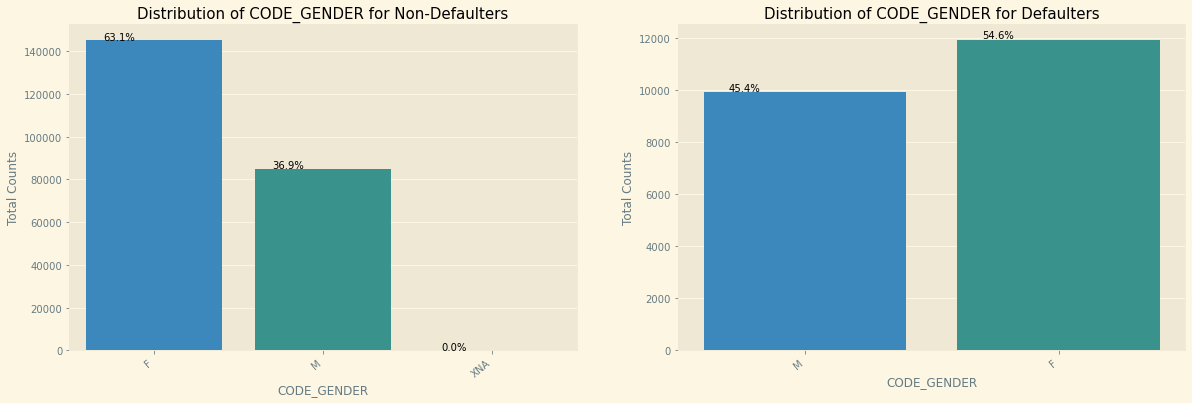

In [60]:
plotunicon('CODE_GENDER')

#### Observations:
- Here,Female contribute 63.1% to the non-defaulters and 54.6% to the defaulters. 
- Females applying for loans than males and hence the more number of female defaulters as well.
- Rate of defaulting of FEMALE is much lower compared to MALE.

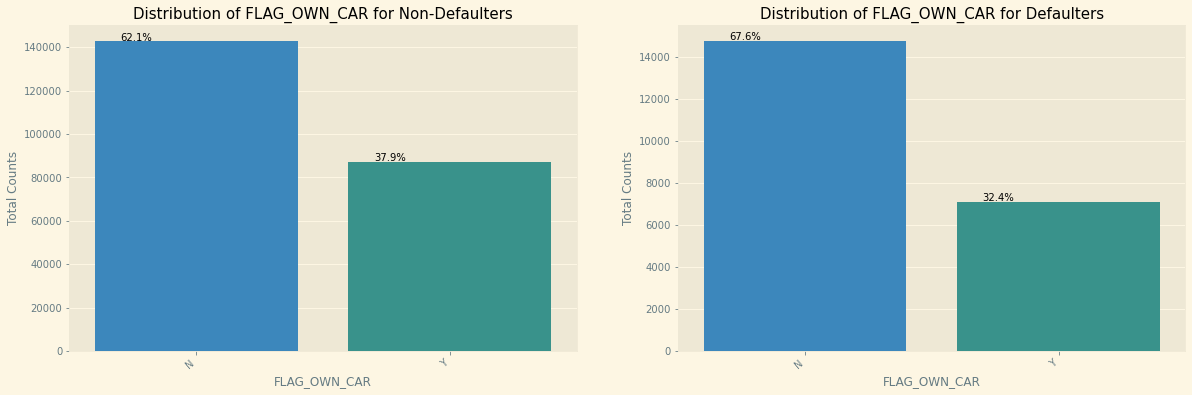

In [61]:
plotunicon('FLAG_OWN_CAR')

##### Observations:
- People without cars contribute 62.1% to the non-defaulters while 67.6 % to the defaulters.
- People who donot have car default more often. 
- There are more people without cars.
- The rate of default of people having car is low compared to people who don't.

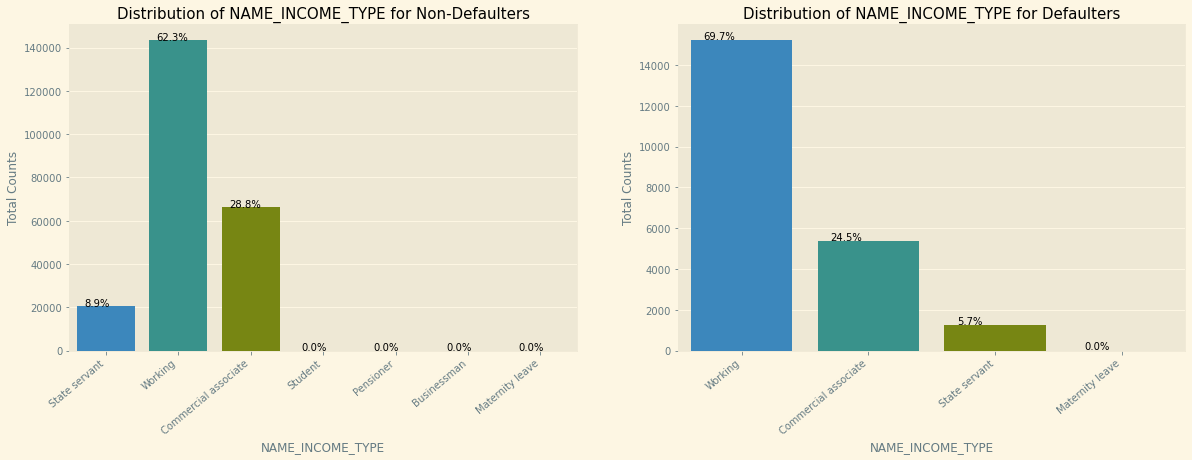

In [62]:
plotunicon('NAME_INCOME_TYPE')


#### Observations:
- It's obvious that the students and BusinessMen don't default.
- Most of the loans are distributed to working class people.
- Working class people contribute 62.3% to non defaulters and 69.7% of the defaulters. 
- Chances of defaulting are more in Working class.

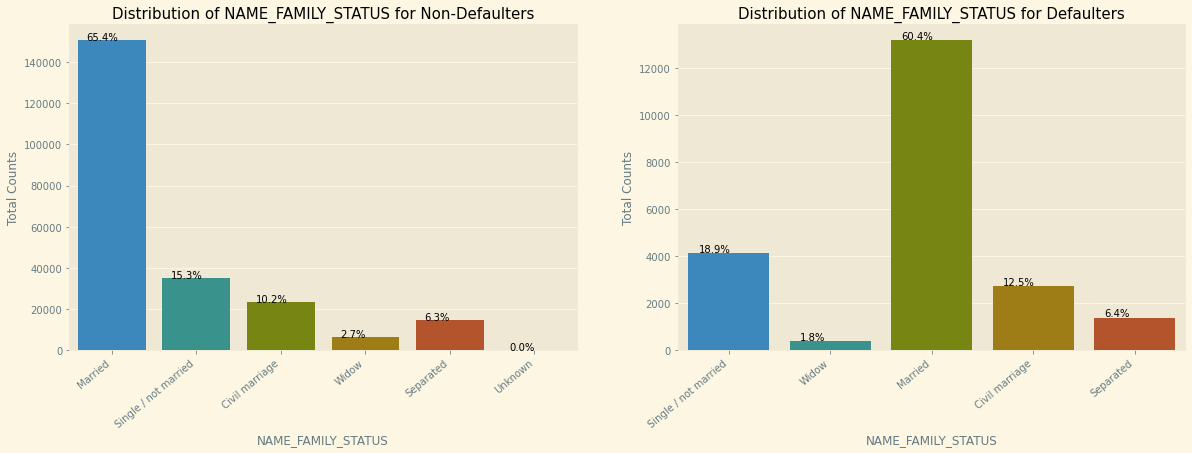

In [63]:
plotunicon('NAME_FAMILY_STATUS')


#### Observations:
- Singles contribute 15.3% to Non Defaulters and 18.9% to the defaulters. 
- More risk is for Singles

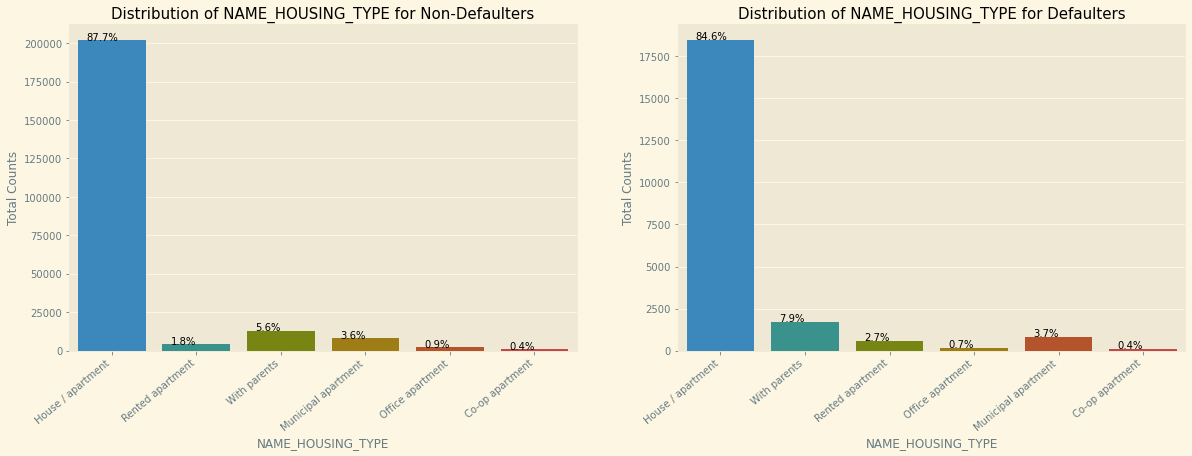

In [64]:
plotunicon('NAME_HOUSING_TYPE')

#### Observations:
- People who have house or department tend to take more loans. 
- People living with parents tend to default more often when compared with others.
- The reason will be increase expense due to looking after  their parents with them.

### Univariate Categorical Ordered Analysis

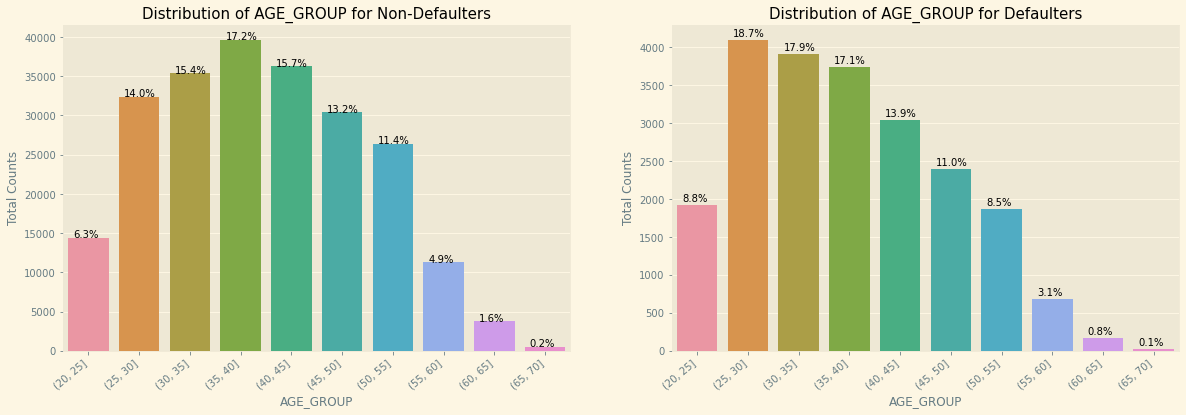

In [65]:
plotunicon('AGE_GROUP')


#### Observations:
- 25-30 age group tend to default more often. 
- With increasing age group, people tend to default less starting from the age 25.
- Reason might be changes in standard of living when they become adults and paid enough.

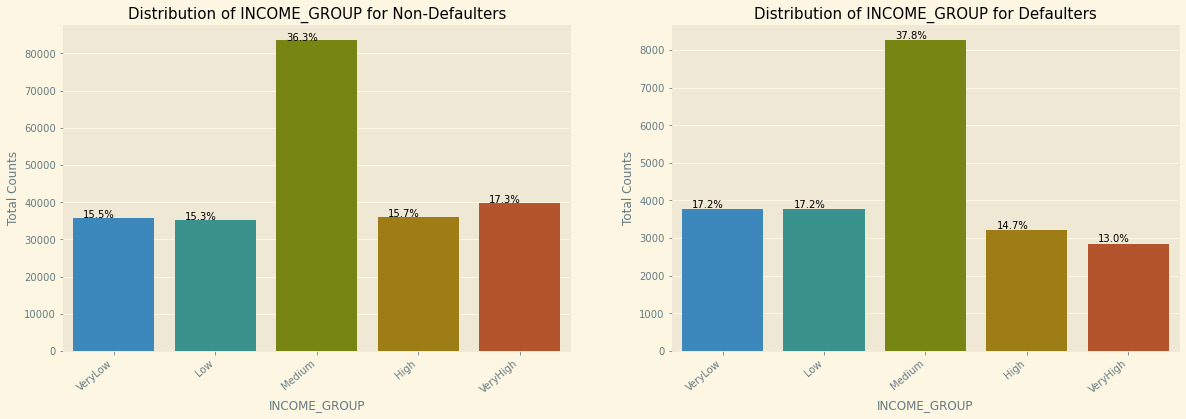

In [66]:
plotunicon('INCOME_GROUP')

#### Observations: 
- Very High income group tend to default less often. 
- They contribute 13% to the total number of defaulters, while they contribute 17.3% to the Non-Defaulters. 
- This might be beacause they earn more and able to cope up with expenditures well.

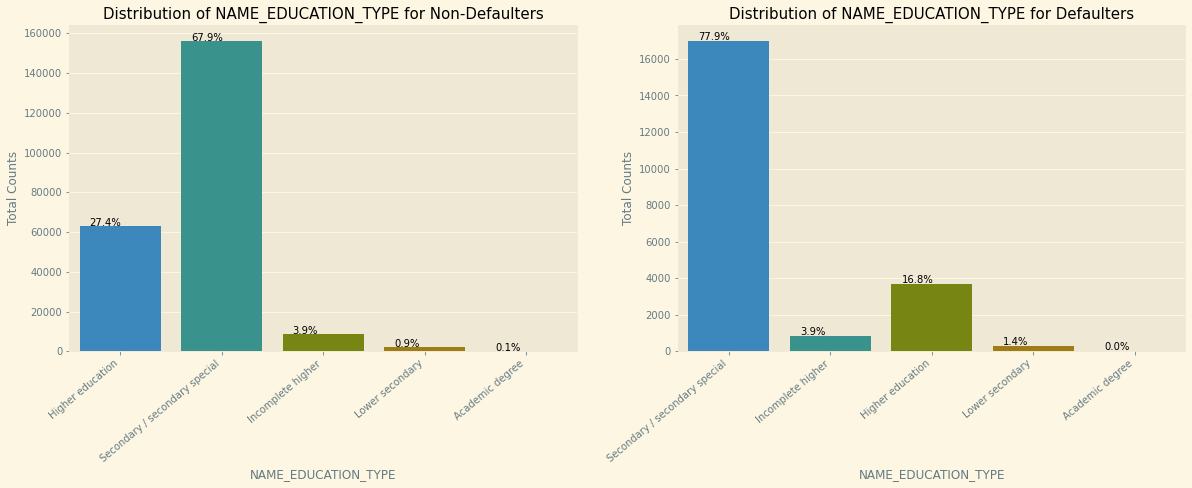

In [67]:
plotunicon('NAME_EDUCATION_TYPE')

#### Observations:
- Higher education streams tends to less likely defaut and all others equally default with secondary having more defaulters

### Univariate continuous variable analysis

In [68]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('Solarize_Light2')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=sep_df1[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=sep_df2[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

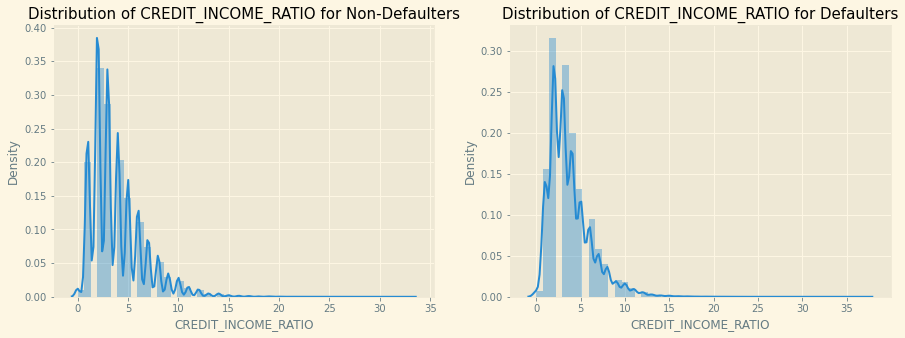

In [69]:
plotunidist('CREDIT_INCOME_RATIO')

#### Observations: 
- The CREDIT_INCOME_RATIO is more for people who default.

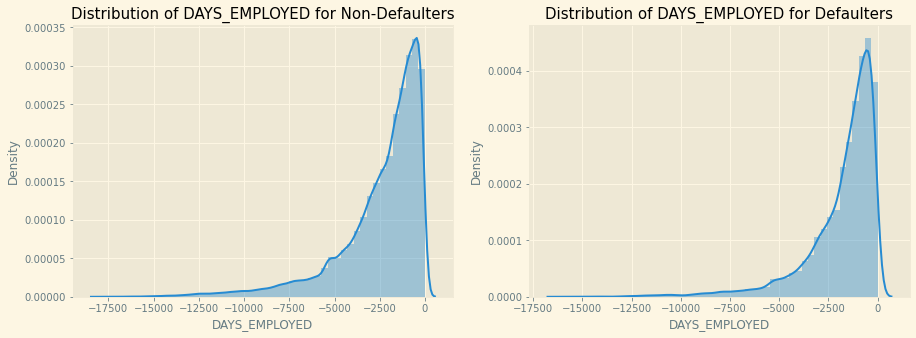

In [70]:
plotunidist('DAYS_EMPLOYED')


#### Observations:
- Days employed is almost similiar in both cases

In [71]:
sep_df2['CNT_FAM_MEMBERS'].value_counts()


2.0     10193
1.0      4620
3.0      4526
4.0      2104
5.0       324
6.0        53
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

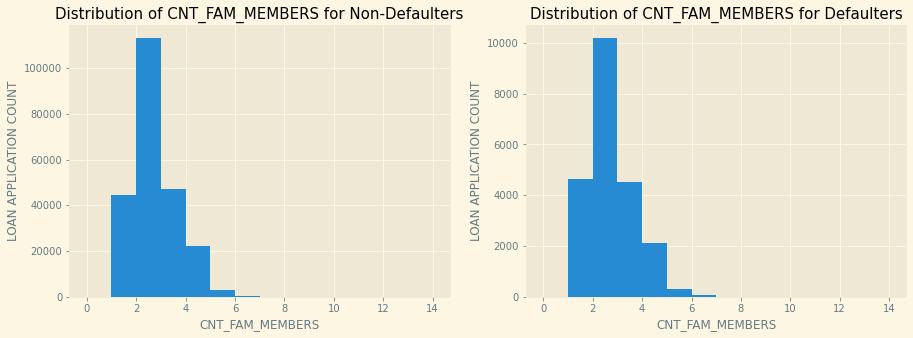

In [72]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sep_df1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
sep_df2['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

#### Observations:
- It's obvious that, family of 3 applies for loan more often than others.
- Reason might be increased expense and lessearning membrs

### Top 10 correlation of columns selected

In [74]:
#Getting the top 10 correlation in sep_df1
corr=sep_df1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
212,AMT_GOODS_PRICE,AMT_CREDIT,0.986726,0.986726
143,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.873422,0.873422
223,AMT_GOODS_PRICE,AMT_ANNUITY,0.766945,0.766945
197,AMT_ANNUITY,AMT_CREDIT,0.762117,0.762117
62,CREDIT_INCOME_RATIO,AMT_CREDIT,0.668927,0.668927
214,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.647707,0.647707
199,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.404428,0.404428
198,AMT_ANNUITY,AMT_INCOME_TOTAL,0.400757,0.400757
213,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.333312,0.333312
47,AMT_INCOME_TOTAL,AMT_CREDIT,0.326155,0.326155


In [75]:
#Getting the top 10 correlation sep_df2
corr=sep_df2.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
212,AMT_GOODS_PRICE,AMT_CREDIT,0.982799,0.982799
143,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.874714,0.874714
223,AMT_GOODS_PRICE,AMT_ANNUITY,0.749379,0.749379
197,AMT_ANNUITY,AMT_CREDIT,0.748708,0.748708
62,CREDIT_INCOME_RATIO,AMT_CREDIT,0.663065,0.663065
214,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.641333,0.641333
199,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.402729,0.402729
95,DAYS_REGISTRATION,DAYS_EMPLOYED,0.137454,0.137454
111,CNT_FAM_MEMBERS,DAYS_REGISTRATION,0.123583,0.123583
215,AMT_GOODS_PRICE,DAYS_EMPLOYED,-0.111933,0.111933


### Bivariate Analysis

In [76]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('Solarize_Light2')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=sep_df1,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=sep_df2,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

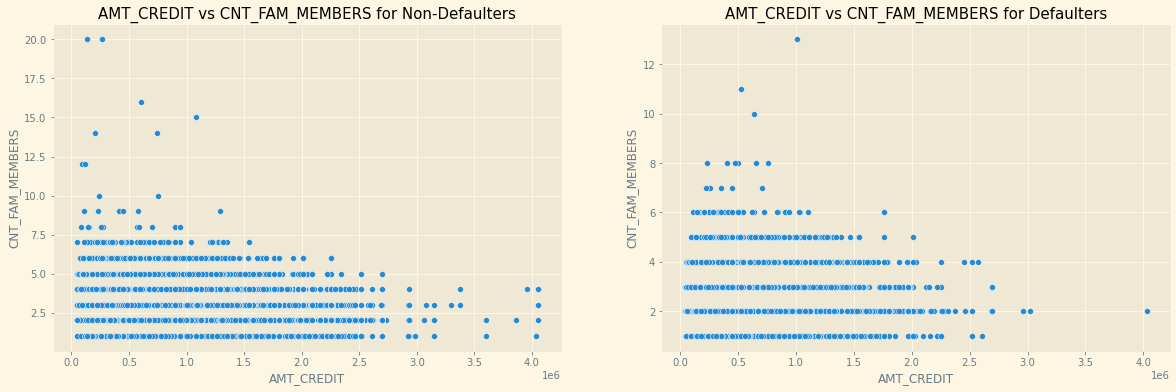

In [77]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')

#### Observations: 
- Density in the lower left corner is similar in both the case.
- People defaults almost similiar if the family is small and the AMT_CREDIT is low. 
- larger families and people with larger AMT_CREDIT default default less

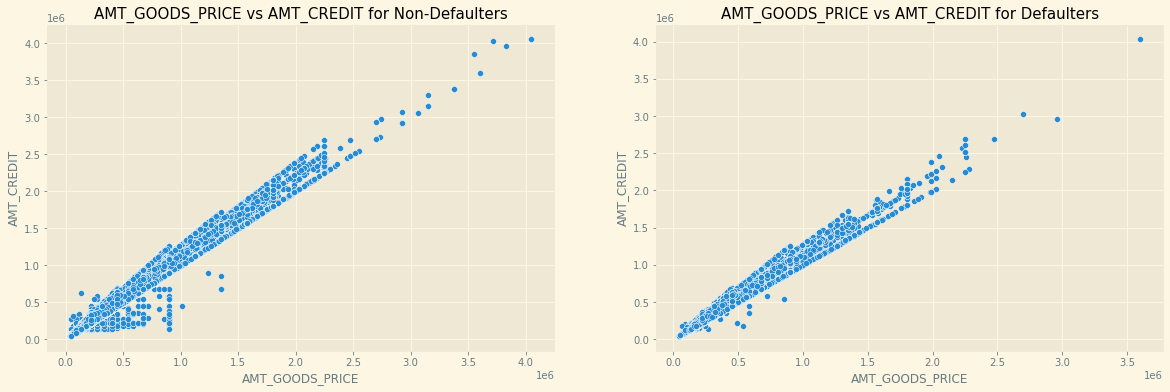

In [78]:
plotbivar('AMT_GOODS_PRICE','AMT_CREDIT')


# 4. Performing data check on Previous data set

In [79]:
#reading file
df_prev = pd.read_csv('previous_application.csv')


In [80]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

In [81]:

def plot_uni(var):

    plt.style.use('Solarize_Light2')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=df_prev,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

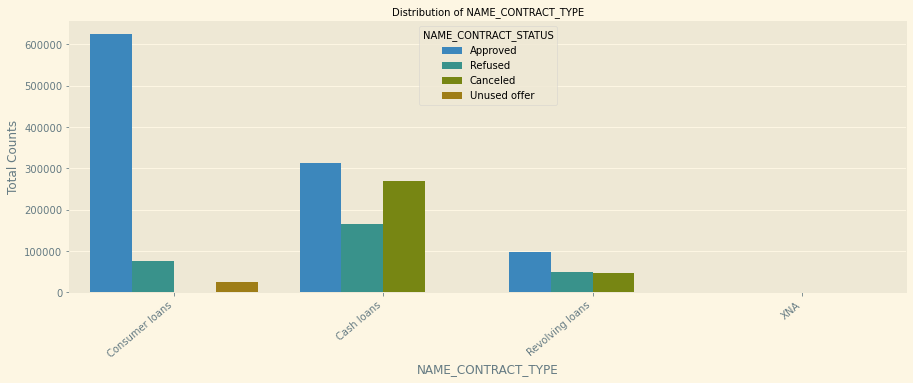

In [89]:
plot_uni('NAME_CONTRACT_TYPE')

#### Observation:
 - Eventhough cash loans are not much accepted, applications 'Cash loan' and 'Consumer loan' are on a majority.

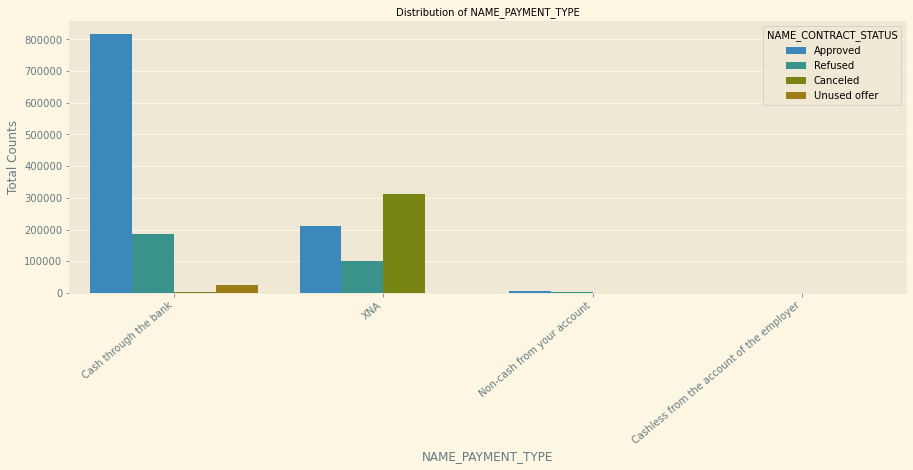

In [82]:
plot_uni('NAME_PAYMENT_TYPE')

### Observation:
- Many chose to repay the loan using the 'Cash through the bank' option
- 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not much used by customers.

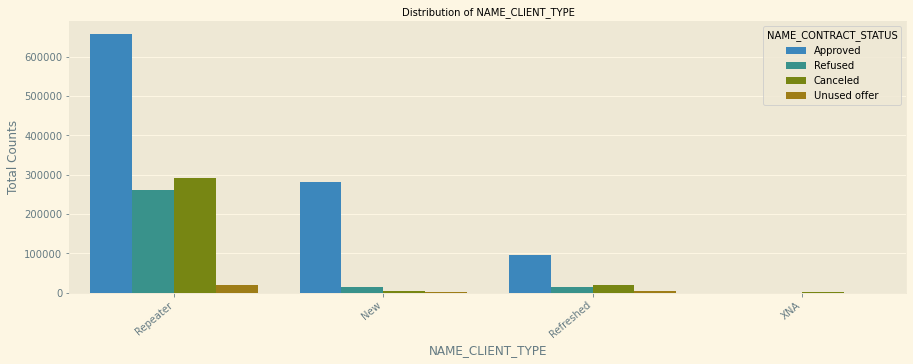

In [83]:
plot_uni('NAME_CLIENT_TYPE')

#### Observations:
- Majority applications are from repeat customers.
- In the total applications 70% of customers are repeaters. 
- Repeaters are mostly refused



## Checking the correlation in the PreviousApplication dataset

In [86]:
#Getting the top 10 correlation PreviousApplication
corr=df_prev.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


### Using pairplot for bivariate Analysis on numerical column

<Figure size 720x360 with 0 Axes>

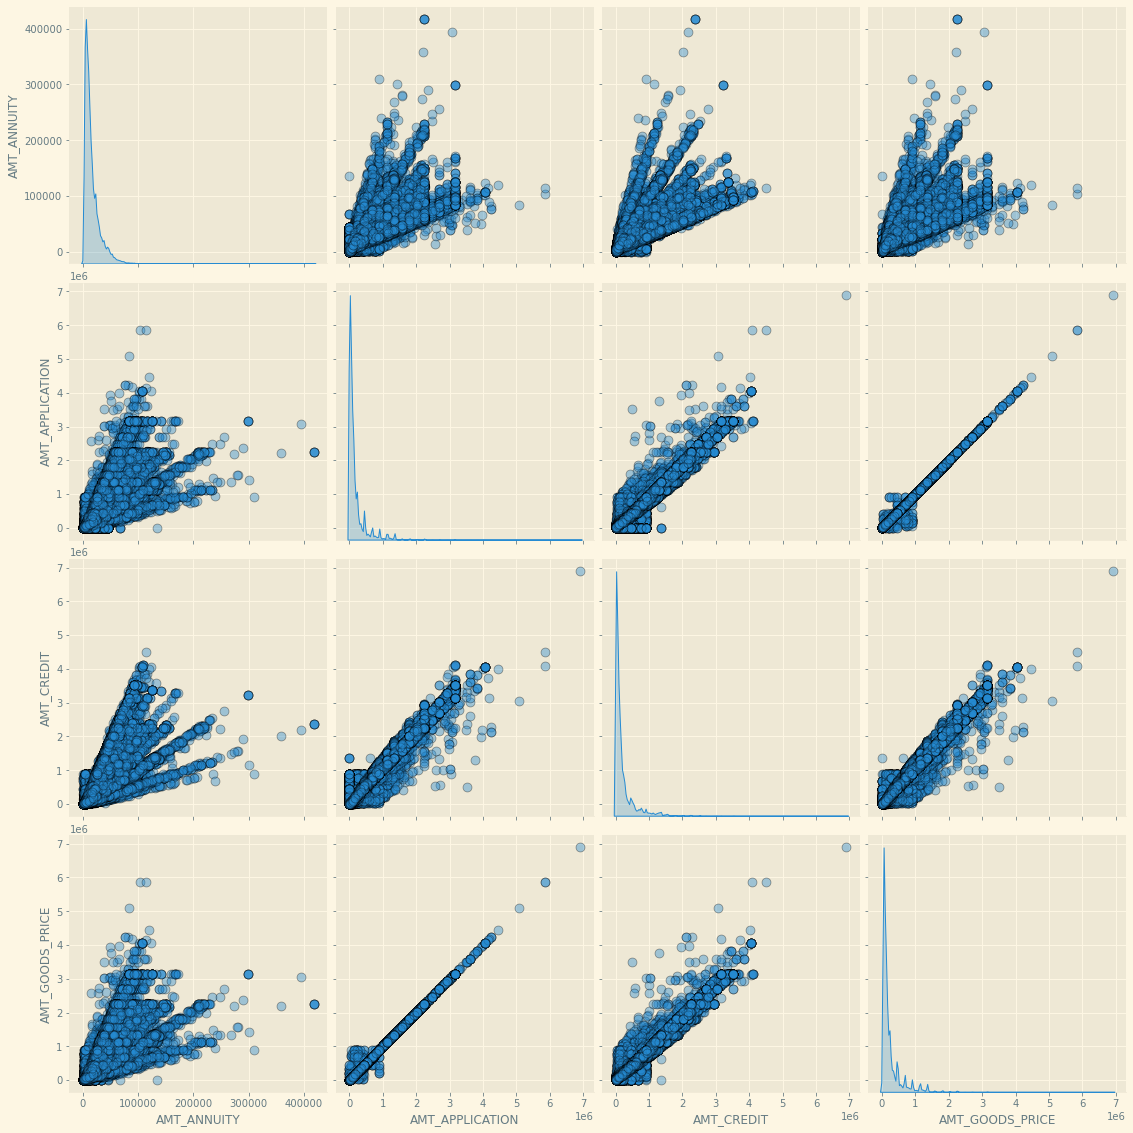

In [88]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[10,5])
sns.pairplot(df_prev[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

#### Observations:
- Previous application's Annunity increase can increase: Goods price asked by client, Final credit amount on the previous application with bank's approval and Credit asked by client on the previous application <br><br>
- Credit client asked is highly influenced by the Goods price of good that client has asked for on the previous application<br><br>
- Final credit amount to the customer previously, after approval improves  the application amount and also the goods price asked by client. 

###  Using box plot to do some more bivariate analysis on categorical vs numeric columns

In [89]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('Solarize_Light2')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=df_prev)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

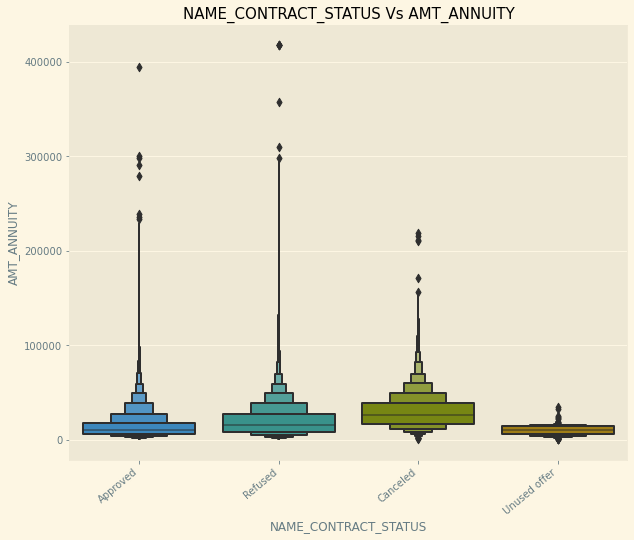

In [90]:
#by-varient analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

#### Observations:
- Loan application for people with lower AMT_ANNUITY gets canceled or unused always.
- Applications with too high AMT ANNUITY also got refused than others.

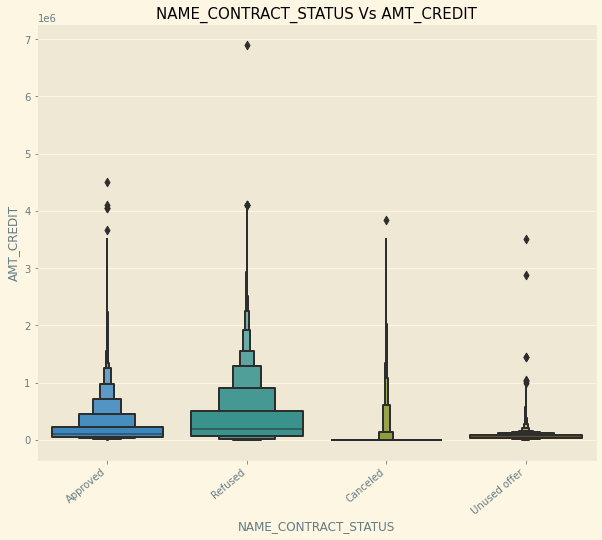

In [91]:
#by-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

#### Observations: 
- it get's cancelled/unused when the AMT_CREDIT is too low.

## Merging the files and analyzing the data

In [96]:
## Merging the two files to do some analysis
LeftPrev = pd.merge(df_last, df_prev, how='left', on=['SK_ID_CURR'])

In [97]:
LeftPrev.shape

(1153787, 63)

In [98]:
LeftPrev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153787 entries, 0 to 1153786
Data columns (total 63 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   SK_ID_CURR                      1153787 non-null  int64   
 1   TARGET                          1153787 non-null  int64   
 2   CODE_GENDER                     1153787 non-null  object  
 3   FLAG_OWN_CAR                    1153787 non-null  object  
 4   FLAG_OWN_REALTY                 1153787 non-null  object  
 5   INCOME_GROUP                    1153787 non-null  category
 6   AGE_GROUP                       1153783 non-null  category
 7   AMT_CREDIT_x                    1153787 non-null  float64 
 8   AMT_INCOME_TOTAL                1153787 non-null  float64 
 9   CREDIT_INCOME_RATIO             1153787 non-null  float64 
 10  NAME_INCOME_TYPE                1153787 non-null  object  
 11  NAME_EDUCATION_TYPE             1153787 non-null  

In [99]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('Solarize_Light2')
    sns.despine
    NewDat = LeftPrev.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

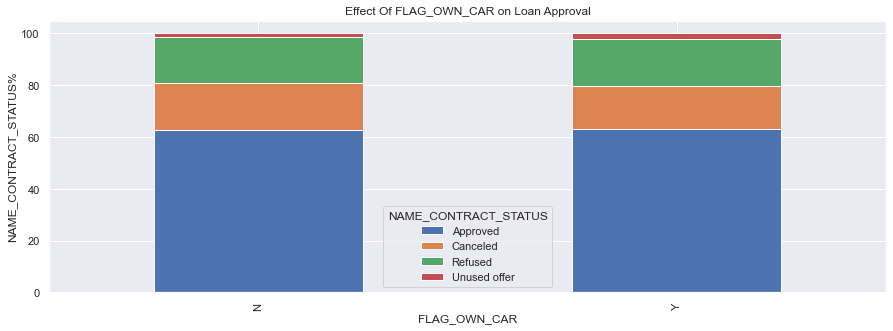

In [100]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

#### Observations:
- Car ownership doesn't have any effect on application approval or rejection. 
- But bank can add more consideration to car ownership while approving a loan amount since according to previous analysis, deafulting is less for people with car.

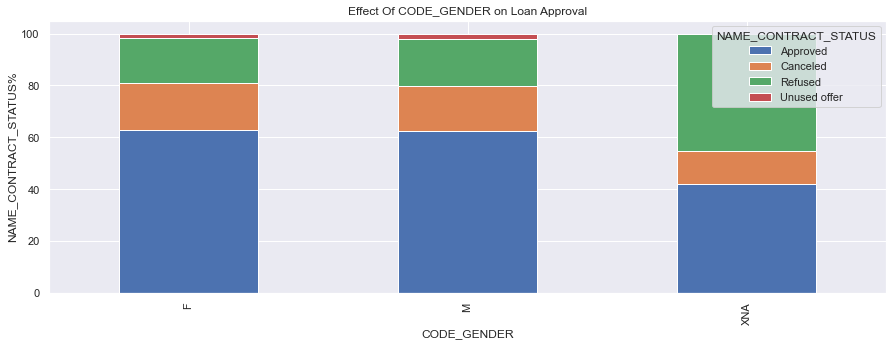

In [101]:
plotuni_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

#### Observations: 
- Code gender doesn't have any effect on application approval or rejection.
- But according to our previous analysis, female have lesser chances of default. 
- The bank can gives consideration to females while approving a loan amount.

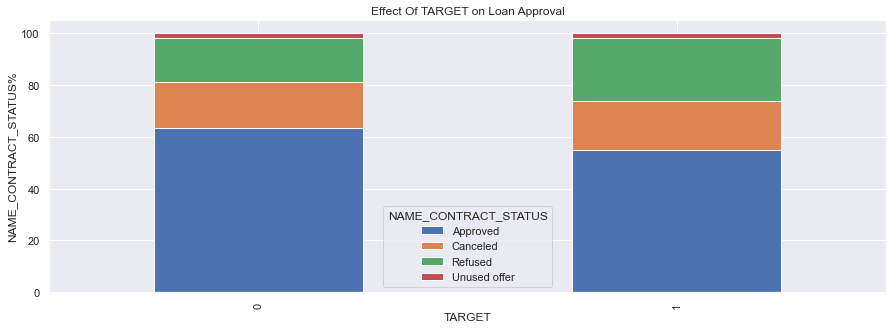

In [102]:
plotuni_combined('TARGET','NAME_CONTRACT_STATUS')

#### Observtions: 
- People who were approved for a loan earlier, defaulted less often 
- People who were refused a loan earlier have higher chances of defaulting. 